In [1]:
import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../') 

from cosmosis.model import tv_model
from cosmosis.learning import Learn, Selector
from cosmosis.dataset import LoadImage

from dataset import Ranzcr

from torch.optim import Adam
from torch.nn import BCEWithLogitsLoss
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms


CDataset created...
epoch: 0 of 30, train loss: 3.197171446992384, val loss: 3.0472476009917786, lr: 0.01
epoch: 3 of 30, train loss: 2.9732519405409756, val loss: 2.97784037717524, lr: 0.01
epoch: 6 of 30, train loss: 2.899348134122892, val loss: 2.890446158865449, lr: 0.01
epoch: 9 of 30, train loss: 2.822044567479268, val loss: 2.816392767177552, lr: 0.01
epoch: 12 of 30, train loss: 2.6790304653047885, val loss: 2.675175064402833, lr: 0.01
epoch: 15 of 30, train loss: 2.5024320443610026, val loss: 2.53070250636045, lr: 0.01
epoch: 18 of 30, train loss: 2.322127763027112, val loss: 2.3686651442606346, lr: 0.01
epoch: 21 of 30, train loss: 2.1834335576903516, val loss: 2.296037054312545, lr: 0.01
epoch: 24 of 30, train loss: 2.0271841784531914, val loss: 2.257635955054584, lr: 0.01
epoch: 27 of 30, train loss: 1.8906842533459922, val loss: 2.1484678362887637, lr: 0.01
test loss: 2.2460400247925154
y_pred:
tensor([[-1.1658e+01, -1.1301e+01, -9.9456e+00, -8.5105e+00, -1.0318e+01,
     

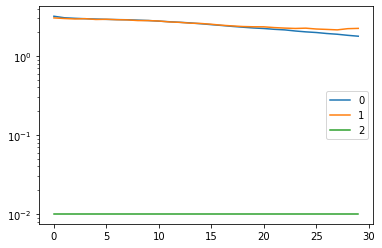

learning time: 1:08:00.783421


In [2]:
ds_params={'train_params': {'embed': [],
                            'image_dir': './data/ranzcr/train',
                            'transform': transforms.Compose([LoadImage(),
                                                             transforms.RandomRotation(5),
                                                             transforms.CenterCrop(1500),
                                                             transforms.Resize((300,300)),
                                                             transforms.RandomCrop(244),
                                                             transforms.ToTensor(),
                                                             ]),
                            'target_transform': None}}

model_params = {'model_name': 'resnet18',
                'in_channels': 1,
                'tv_params': {'num_classes': 11}}
    
opt_params = {'lr': 0.01}
crit_params = {'reduction': 'sum'}
sample_params = {'set_seed': False,
                 'splits': (.7,.15)}
sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 2}

l = Learn([Ranzcr], tv_model, Selector, 
          Optimizer=Adam, Scheduler=ReduceLROnPlateau, Criterion=BCEWithLogitsLoss, 
          model_params=model_params, ds_params=ds_params, sample_params=sample_params,
          opt_params=opt_params, sched_params=sched_params, crit_params=crit_params,
          adapt=False, load_model=False, load_embed=False, save_model=True,
          batch_size=64, epochs=30)

In [10]:
ds_params={'train_params': {'embed': [],
                            'image_dir': './data/ranzcr/train',
                            'transform': transforms.Compose([LoadImage(),
                                                             transforms.RandomRotation(5),
                                                             transforms.CenterCrop(1500),
                                                             transforms.Resize((300,300)),
                                                             transforms.RandomCrop(244),
                                                             transforms.ToTensor(),
                                                             ]),
                            'target_transform': None}}

ranzcr = Ranzcr(**ds_params['train_params'])

CDataset created...


In [26]:
ranzcr.ds_idx[0]

'86119358030110783442164990675803210852'

In [12]:
ranzcr['86119358030110783442164990675803210852']

(tensor([[[0.2196, 0.2549, 0.2706,  ..., 0.0588, 0.0588, 0.0549],
          [0.2000, 0.2471, 0.2745,  ..., 0.0667, 0.0667, 0.0667],
          [0.1843, 0.2353, 0.2784,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.4471, 0.4431, 0.4431,  ..., 0.5373, 0.5255, 0.5137],
          [0.4745, 0.4667, 0.4588,  ..., 0.5333, 0.5333, 0.5176],
          [0.4980, 0.4784, 0.4706,  ..., 0.5294, 0.5333, 0.5216]]]),
 tensor([0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.], dtype=torch.float64),
 [])

In [43]:
import torchvision
from IPython.display import display

im = torchvision.transforms.ToPILImage()(ranzcr[ranzcr.ds_idx[100]][0])

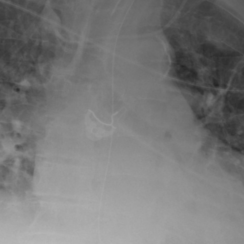

In [44]:
display(im)